1. First five rows of the DataFrame:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

2. Dataset dimensions: (550, 7)

3. Are there any missing values?
name           0
author         0
user_rating    0
reviews        0
price          0
year  

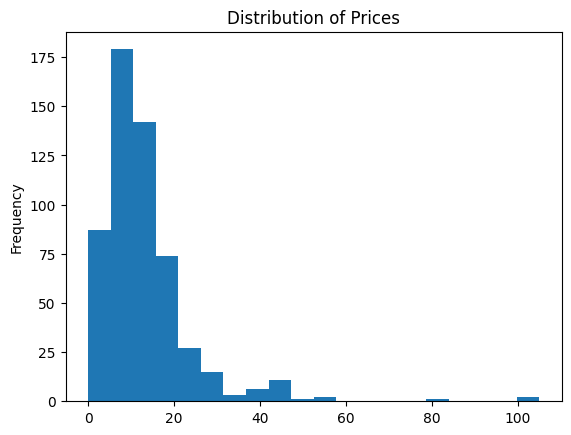

In [1]:
import pandas as pd

# 1. Read the CSV file into a DataFrame
df = pd.read_csv("Hw2.3.csv")

# 2. Display the first five rows of the DataFrame
print("1. First five rows of the DataFrame:")
print(df.head())

# 3. Display the dimensions of the dataset
print("\n2. Dataset dimensions:", df.shape)

# 4. Change column names to snake_case
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# 5. Check for missing values
print("\n3. Are there any missing values?")
print(df.isna().sum())

# 6. Check unique values in the genre column
print("\n4. Unique genres:", df['genre'].unique())

# 7. Distribution of prices
print("\n5. Distribution of Prices:")
df['price'].plot(kind='hist', bins=20, title='Distribution of Prices')

# 8. Summary statistics of prices
print("\n6. Summary statistics of prices:")
print("Maximum price:", df['price'].max())
print("Minimum price:", df['price'].min())
print("Mean price:", df['price'].mean())
print("Median price:", df['price'].median())

# 9. Highest rating
max_rating = df['user_rating'].max()
print("\n7. Highest rating:", max_rating)
print("8. Number of books with the highest rating:", df[df['user_rating'] == max_rating].shape[0])

# 10. Book with the most reviews
max_reviews_book = df[df['reviews'] == df['reviews'].max()]
print("\n9. Book with the most reviews:")
print(max_reviews_book[['name', 'reviews']])

# 11. Most expensive book in 2015
max_price_2015 = df[(df['year'] == 2015) & (df['genre'] == 'Fiction')]['price'].max()
print("\n10. Most expensive book in 2015:", max_price_2015)

# 12. Number of Fiction books in Top 50 in 2010
num_fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print("\n11. Number of Fiction books in Top 50 in 2010:", num_fiction_2010)

# 13. Number of books with rating 4.9 in 2010 and 2011
num_rating_49_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("\n12. Number of books with rating 4.9 in 2010 and 2011:", num_rating_49_2010_2011)

# 14. Sort books in 2015 by price less than $8
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print("\n13. Last book on the sorted list:")
print(sorted_books_2015.iloc[-1])

# 15. Max and min prices for each genre
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print("\n14. Max and min prices for each genre:")
print(genre_prices)

# 16. Number of books for each author
author_books = df.groupby('author').size().reset_index(name='num_books')
print("\n15. Dimensions of author_books table:", author_books.shape)
print("16. Author with the most books:")
print(author_books.loc[author_books['num_books'].idxmax()])

# 17. Mean rating for each author
author_mean_rating = df.groupby('author')['user_rating'].mean().reset_index(name='mean_rating')
print("\n17. Author with the lowest mean rating:")
print(author_mean_rating.loc[author_mean_rating['mean_rating'].idxmin()])

# 18. Merge author_books and author_mean_rating
author_stats = pd.concat([author_books.set_index('author'), author_mean_rating.set_index('author')], axis=1)
author_stats = author_stats.reset_index()
author_stats.columns = ['author', 'num_books', 'mean_rating']
author_stats_sorted = author_stats.sort_values(by=['num_books', 'mean_rating'])
print("\n18. First author on the sorted list:")
print(author_stats_sorted.iloc[0]['author'])